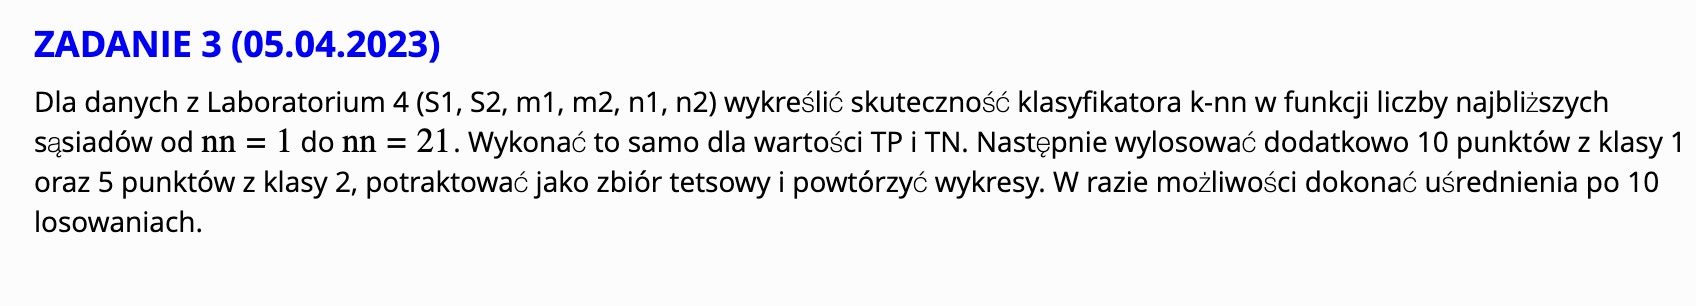

In [1]:
import numpy as np
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
import matplotlib.pyplot as plt

In [2]:
#input dataset
def draw_data(n1, n2, m1, m2, S1, S2):

    data1 = np.random.multivariate_normal(m1, S1, n1)
    data2 = np.random.multivariate_normal(m2, S2, n2)

    data = np.concatenate((data1, data2), axis = 0)
    data = pd.DataFrame(data, columns=["x", "y"])

    data["klasa"] = np.repeat([0, 1], [n1, n2])
    
    return data

m1, m2 = [-1, -1], [2, 2]
S1 = [[4, 2], [2, 4]]
S2 = [[4, 2], [2, 4]]


In [3]:
#prepare 21 classifiers
def prepare_clf(X, y):
    knns = []
    for i in range(1, 22):
        knn = KNeighborsClassifier(n_neighbors = i)
        knn.fit(X, y)
        knns.append(knn)
    return knns

#binary classifier stats
def knn_stats(X, y, knn_clf):
    cm = metrics.confusion_matrix(y, knn_clf.predict(X))
    TN = cm[0][0]
    TP = cm[1][1]
    FP = cm[0][1]
    prec = TP/(TP+FP)
    return prec, TP, TN

#stats for each classifier
def prepare_stats(X, y, knn_clfs):
    nn = []
    precs = []
    TPs = []
    TNs = []
    for i, knn in enumerate(knn_clfs):
        prec, tp, tn = knn_stats(X, y, knn)
        nn.append(i+1)
        precs.append(prec)
        TPs.append(tp)
        TNs.append(tn)
    return nn, precs, TPs, TNs

In [4]:
#plots
def plot_precision(nn, precs):
    plt.figure(figsize=(8, 6), dpi=100)
    plt.plot(nn, precs, label='precision')
    plt.xlabel('n-neighbours')
    plt.ylabel('precision')
    plt.title('Precision of k-nn classifier (n-neighbours)')
    plt.show()

def plot_TP_TN(nn, TPs, TNs):
    plt.figure(figsize=(8, 6), dpi=100)
    plt.plot(nn, TPs, label='TP', color='green')
    plt.plot(nn, TNs, label='TN', color = 'red')
    plt.xlabel('n-neighbours')
    plt.ylabel('counts')
    plt.legend(loc='upper right')
    plt.title('TPs and TNs of k-nn classifier (n-neighbours)')
    plt.show()


def plotter(nn, precs, TPs, TNs):
    plot_precision(nn, precs)
    plot_TP_TN(nn, TPs, TNs)
    

Najpierw sprawdzimy wyniki dla próby treningowej

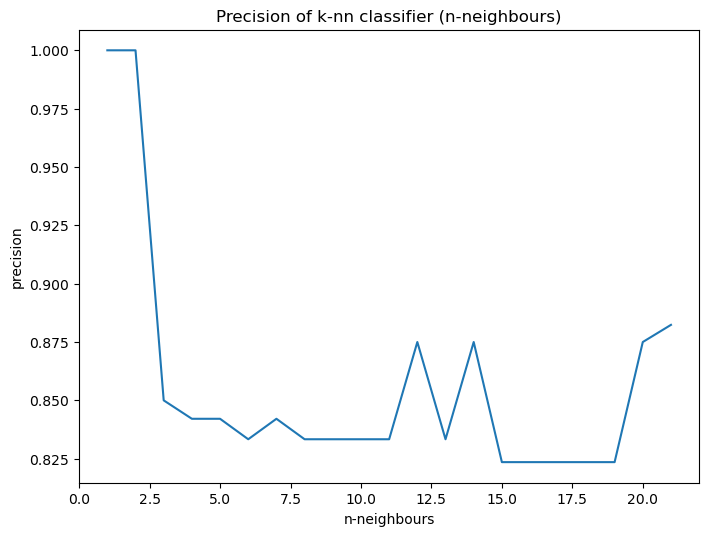

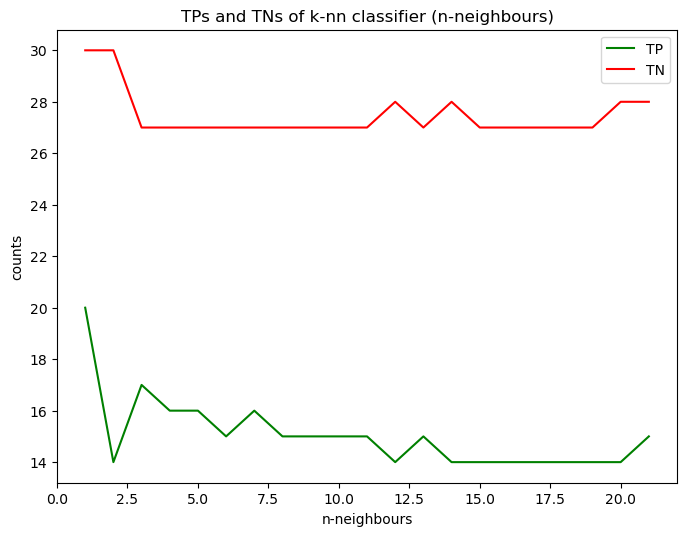

In [5]:
#for training data
n1, n2 = 30, 20
data = draw_data(n1, n2, m1, m2, S1, S2)
X = data[["x", "y"]]
y = data.klasa
#prepare classifiers once
knns = prepare_clf(X, y)
nn, precs, TPs, TNs = prepare_stats(X, y, knns)
plotter(nn, precs, TPs, TNs)

Powtórzymy wykresy dla próby testowej, klasyfikatory pozostają takie same, pojawiają się natomiast nowe dane. Uśrednimy wyniki 10 losowań

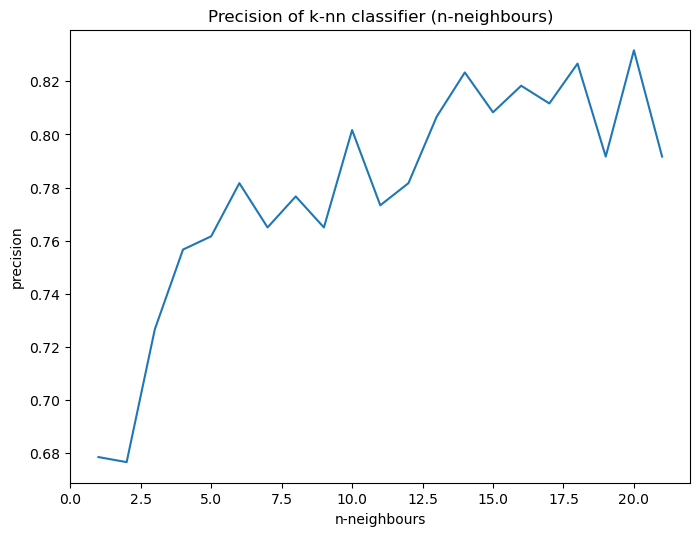

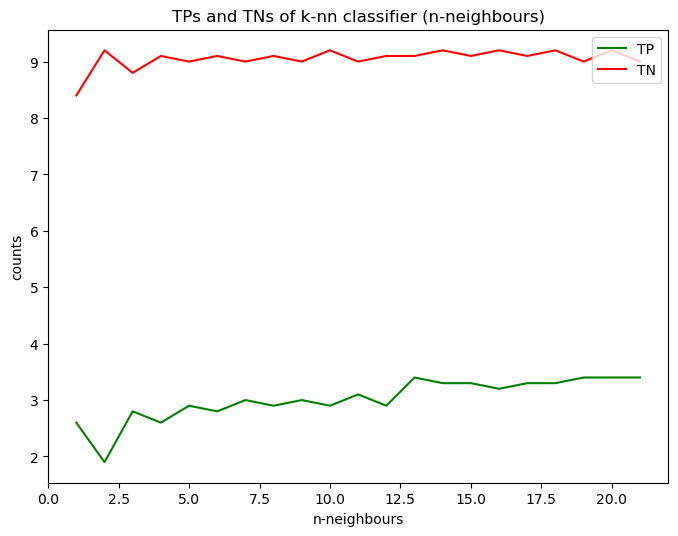

In [6]:
#for test data, we use classifiers from previous cell
ten_precs, ten_TPs, ten_TNs = [], [], []
nn = []
for i in range(10):
    n1, n2 = 10, 5
    data = draw_data(n1, n2, m1, m2, S1, S2)
    X = data[["x", "y"]]
    y = data.klasa
    nn, precs, TPs, TNs = prepare_stats(X, y, knns)
    ten_precs.append(precs)
    ten_TPs.append(TPs)
    ten_TNs.append(TNs)
#average of ten draws
precs = np.sum(ten_precs, axis=0) / len(ten_precs)
TPs = np.sum(ten_TPs, axis=0) / len(ten_TPs)
TNs = np.sum(ten_TNs, axis=0) / len(ten_TNs)

plotter(nn, precs, TPs, TNs)